In [1]:
import torch.nn as nn
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from utils.ann_utils import train, plot
from utils.utils import load
from models.NN_Models import NeighborNN, MLP, NeighborCompressedNN, DNeighborCompressedNN
from utils.utils import cross_validation

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
X, y, X_test, y_test = load("data/complete", "RiskPerformance")

X = torch.Tensor(X).to(device)
y = torch.Tensor(y).to(device)

X_test = torch.Tensor(X_test).to(device)
y_test = torch.Tensor(y_test).to(device)

In [4]:
criterion = F.binary_cross_entropy
model = NeighborCompressedNN(100, 5, 10).to(device)
model.fit(X, y, 200, device="cuda")
y.shape
features = torch.cat((X, y.view(-1, 1)), dim = 1)

<Axes: >

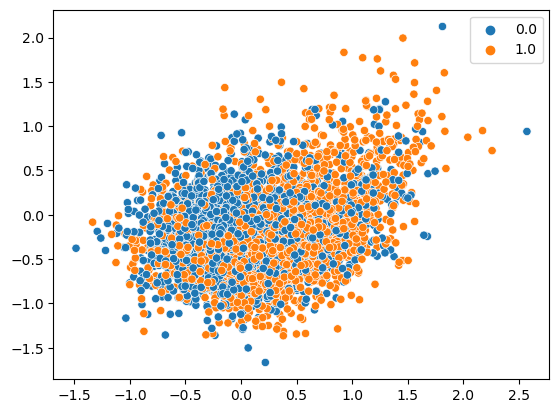

In [5]:

compression = model.neighbors_gate(features).detach().cpu()
import seaborn as sns
sns.scatterplot(x = compression[:, 0], y = compression[:, 1], hue = y.detach().cpu())

In [4]:
criterion = F.binary_cross_entropy
n_neighbors = 100
compression_size = 2
neighbor_size = 10
hidden = 10
model = DNeighborCompressedNN(100, 2, 5, 10).to(device)
model.fit(X, y, 200, device="cuda")
y.shape
features = torch.cat((X, y.view(-1, 1)), dim = 1)

<Axes: >

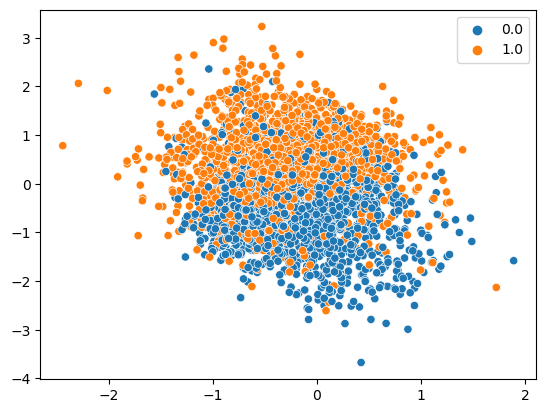

In [5]:
compression = model.neighbors_gate(features).detach().cpu()
import seaborn as sns
sns.scatterplot(x = compression[:, 0], y = compression[:, 1], hue = y.detach().cpu())

In [ ]:
generator = torch.Generator(device=device).manual_seed(1)

permutation = torch.randperm(X.size()[0], generator = generator, device = device)

N = int(permutation.shape[0] * 0.8)

X_train = X[permutation[:N]]
y_train = y[permutation[:N]]
X_val = X[permutation[N:]]
y_val = y[permutation[N:]]
X_train.shape, X_val.shape

(torch.Size([3324, 10]), torch.Size([832, 10]))

In [ ]:
(torch.Tensor([0.2, 0.4, 0.5]) >= 0.5).float()

tensor([0., 0., 1.])

In [ ]:
criterion = F.binary_cross_entropy
# model = Neighbor_NN(X_train, y_train, 5, 20).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, l2_lambda=1e-3)

params_of_fit= {
    "epochs": 644,
    "batch_size": 64,
    "device": 'cuda',
    "lr": 0.01,
    "l2_lambda": 1e-3
  }

params_initialization= {
    "hidden": 8
  }

print(cross_validation(MLP, X_train, y_train, 10, params_initialization=params_initialization, params_of_fit = params_of_fit, device="cuda"))




TypeError: cross_validation() missing 1 required positional argument: 'nFolds'

In [ ]:
criterion = F.binary_cross_entropy
# model = Neighbor_NN(X_train, y_train, 5, 20).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, l2_lambda=1e-3)
init_params = {"n_neighbors": 5, "hidden": 20}
print(cross_validation(NeighborNN, X_train, y_train, 10, params_initialization=init_params, params_of_fit = {"device": "cuda", "epochs": 250}, device="cuda"))


TypeError: SGD.__init__() got an unexpected keyword argument 'l2_lambda'

In [ ]:


criterion = F.binary_cross_entropy
model = NeighborNN(X_train, y_train, 5, 20).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, l2_lambda=1e-3)

losses = []
losses_val = []

TypeError: NeighborNN.__init__() takes from 2 to 4 positional arguments but 5 were given

In [ ]:
new_losses, new_losses_val = train(X_train, y_train, X_val, y_val, model, criterion, optimizer, epochs = 50, batch_size=64, device = device)
losses = losses + new_losses
losses_val = losses_val + new_losses_val

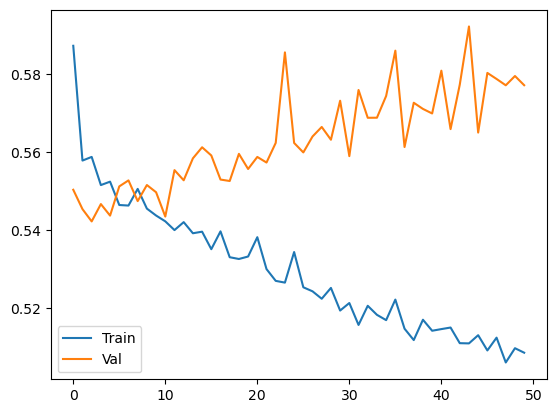

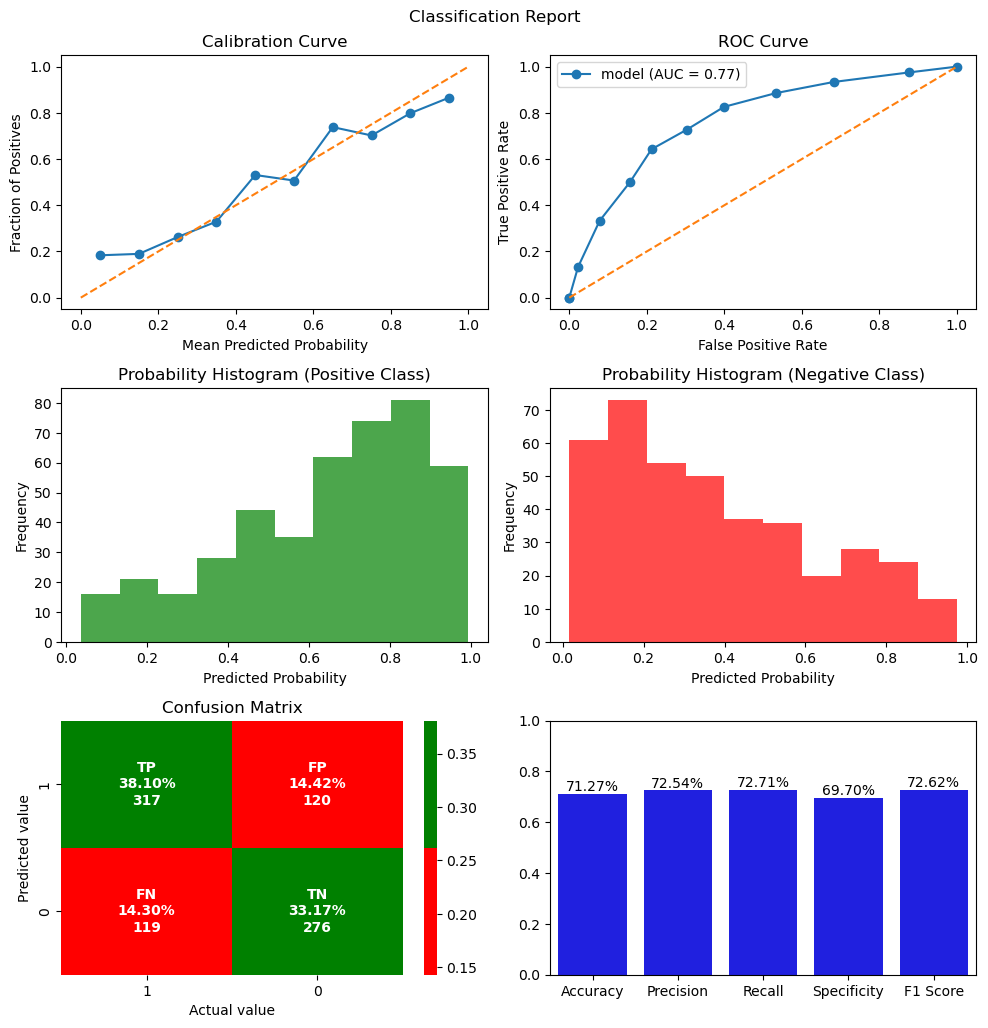

In [ ]:
plot(losses, losses_val, model, X_val, y_val)

In [ ]:

criterion = F.binary_cross_entropy
# model = Neighbor_NN(X_train, y_train, 5, 20).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, l2_lambda=1e-3)

params_of_fit= {
    "epochs": 644,
    "batch_size": 64,
    "device": 'cuda',
    "lr": 0.01,
    "l2_lambda": 1e-3
  }

params_initialization= {
    "hidden": 8
  }

print(cross_validation(MLP, X_train, y_train, 10, params_initialization=params_initialization, params_of_fit = params_of_fit, device="cuda"))


[Parameter containing:
tensor([[-0.1250,  0.3109,  0.1608, -0.1455, -0.2103,  0.3228, -0.2307,  0.1506]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.0638], device='cuda:0', requires_grad=True)]
[Parameter containing:
tensor([[-0.1250,  0.3109,  0.1608, -0.1455, -0.2103,  0.3228, -0.2307,  0.1506]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.0638], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.0413, -0.1873,  0.1813,  0.2188, -0.1363,  0.3009, -0.2576,  0.2708,
          0.1819, -0.3162],
        [ 0.1671, -0.2480,  0.0231,  0.0792,  0.0469, -0.1982, -0.1577,  0.2567,
         -0.0491, -0.2351],
        [ 0.1753, -0.0443,  0.0369, -0.2228, -0.1399,  0.0385,  0.0465,  0.1769,
          0.2493, -0.1539],
        [ 0.1209,  0.2957,  0.0376,  0.0665,  0.1817,  0.2165,  0.2491, -0.1581,
          0.3033, -0.1934],
        [ 0.0098,  0.2370, -0.0330, -0.1882,  0.1925,  0.1926,  0.0753,  0.0347,
     

KeyboardInterrupt: 

In [ ]:

criterion = F.binary_cross_entropy
fan_in = X_train.shape[1]
mlp = MLP(8).to(device)
mlp.fit(X_train, y_train, 500, device="cuda")


[Parameter containing:
tensor([[-0.0724,  0.0486,  0.2931,  0.0717, -0.1234, -0.0725,  0.0883, -0.3216]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.2580], device='cuda:0', requires_grad=True)]
2
[Parameter containing:
tensor([[-0.0724,  0.0486,  0.2931,  0.0717, -0.1234, -0.0725,  0.0883, -0.3216]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.2580], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[-0.2825, -0.2071,  0.2520,  0.0056, -0.1650, -0.2568,  0.1564, -0.2774,
         -0.0594,  0.1112],
        [-0.1707,  0.2519,  0.1792,  0.2512,  0.1349, -0.3119, -0.1082, -0.0610,
         -0.0754,  0.2786],
        [-0.2710, -0.0330,  0.0846,  0.0939,  0.2721, -0.0834, -0.2755, -0.0556,
         -0.0326,  0.1577],
        [ 0.1157,  0.0607,  0.0961, -0.2574,  0.3162, -0.1522,  0.0467,  0.1890,
          0.0235,  0.0934],
        [ 0.0270, -0.3132, -0.3056, -0.2637, -0.2372, -0.3133, -0.1911,  0.1015,
 

In [ ]:
len(y_train), sum(y_train) / len(y_train)

(3324, tensor(0.5135, device='cuda:0'))

In [ ]:
len(y_val), sum(y_val) / len(y_val)


(832, tensor(0.5240, device='cuda:0'))

3324 3324.0


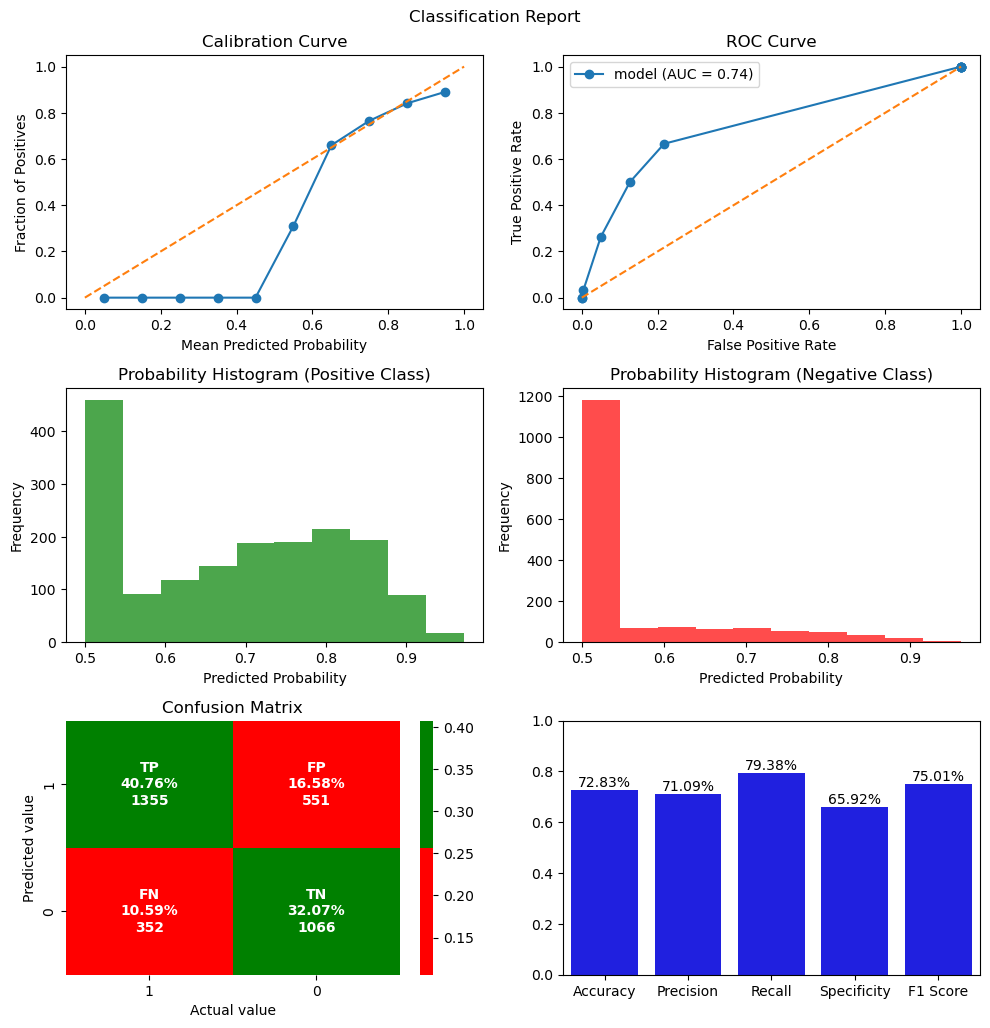

{'Confusion Matrix': [1066, 551, 352, 1355],
 'Accuracy': 0.7283393501805054,
 'Precision': 0.710912906610703,
 'Recall': 0.7937902753368483,
 'Specificity': 0.6592455163883735,
 'F1 Score': 0.7500691945751454}

In [ ]:
preds = mlp.predict(X_train)
print(len(preds), sum(preds))
preds = mlp.predict_proba(X_train)
from utils.utils import classification_report
classification_report(y_train, preds, 1)

In [ ]:
X_train.shape

torch.Size([3324, 10])

In [ ]:
mlp = MLP(5).to(device)
mlp.fit(X_train, y_train, 0, device="cuda")
optimizer = torch.optim.Adam(mlp.parameters(), lr = 0.01, weight_decay=1e-3)
losses = []
losses_val = []

[Parameter containing:
tensor([[ 0.0889,  0.1217,  0.4298, -0.2003, -0.1601]], device='cuda:0',
       requires_grad=True), Parameter containing:
tensor([-0.2748], device='cuda:0', requires_grad=True)]
2
[Parameter containing:
tensor([[ 0.0889,  0.1217,  0.4298, -0.2003, -0.1601]], device='cuda:0',
       requires_grad=True), Parameter containing:
tensor([-0.2748], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[-0.1770, -0.0226, -0.2446,  0.0300,  0.1366, -0.0099,  0.1037,  0.0352,
          0.0833,  0.0067],
        [ 0.0273,  0.1137,  0.0243,  0.1949,  0.1087,  0.2775, -0.0854,  0.2747,
          0.1384,  0.1406],
        [ 0.2346, -0.1222, -0.2934,  0.0870,  0.2552,  0.2274, -0.1593, -0.0602,
         -0.2598, -0.0292],
        [-0.0625, -0.0910, -0.0509, -0.1934,  0.2809,  0.2577,  0.0990, -0.3114,
          0.1612, -0.1758],
        [ 0.1140,  0.1965,  0.1767,  0.2328, -0.2258,  0.2806, -0.0627, -0.2870,
         -0.0617, -0.2612]], device='cuda:0', requires_

In [ ]:
new_losses, new_losses_val = train(X_train, y_train, X_val, y_val, mlp, criterion=criterion, l2_lambda=1e-3, learning_rate=0.01, epochs = 50, batch_size=64, device = device)
losses = losses + new_losses
losses_val = losses_val + new_losses_val

3324 3324.0


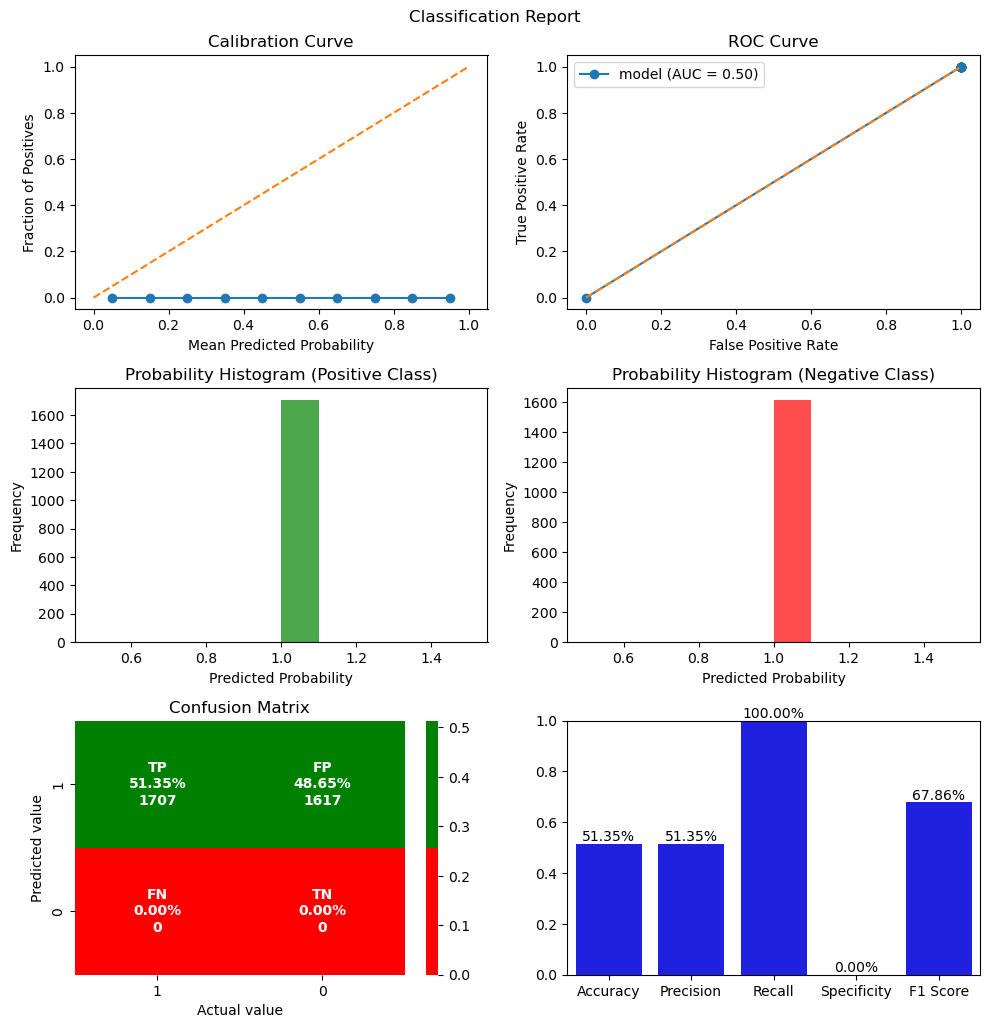

{'Confusion Matrix': [0, 1617, 0, 1707],
 'Accuracy': 0.5135379061371841,
 'Precision': 0.5135379061371841,
 'Recall': 1.0,
 'Specificity': 0.0,
 'F1 Score': 0.678592725104353}

In [ ]:
mlp.eval()
preds = mlp.predict_proba(X_train)
preds = mlp.predict(X_train)
print(len(preds), sum(preds))
from utils.utils import classification_report
classification_report(y_train, preds, 1)

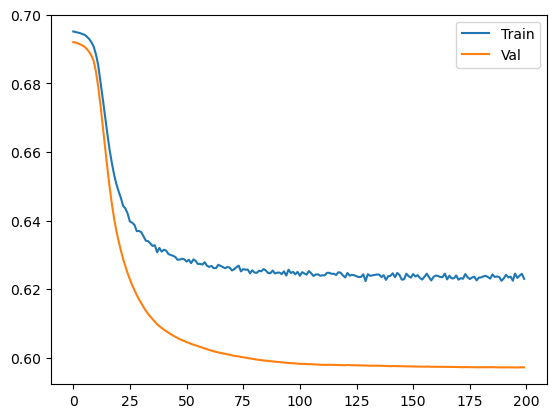

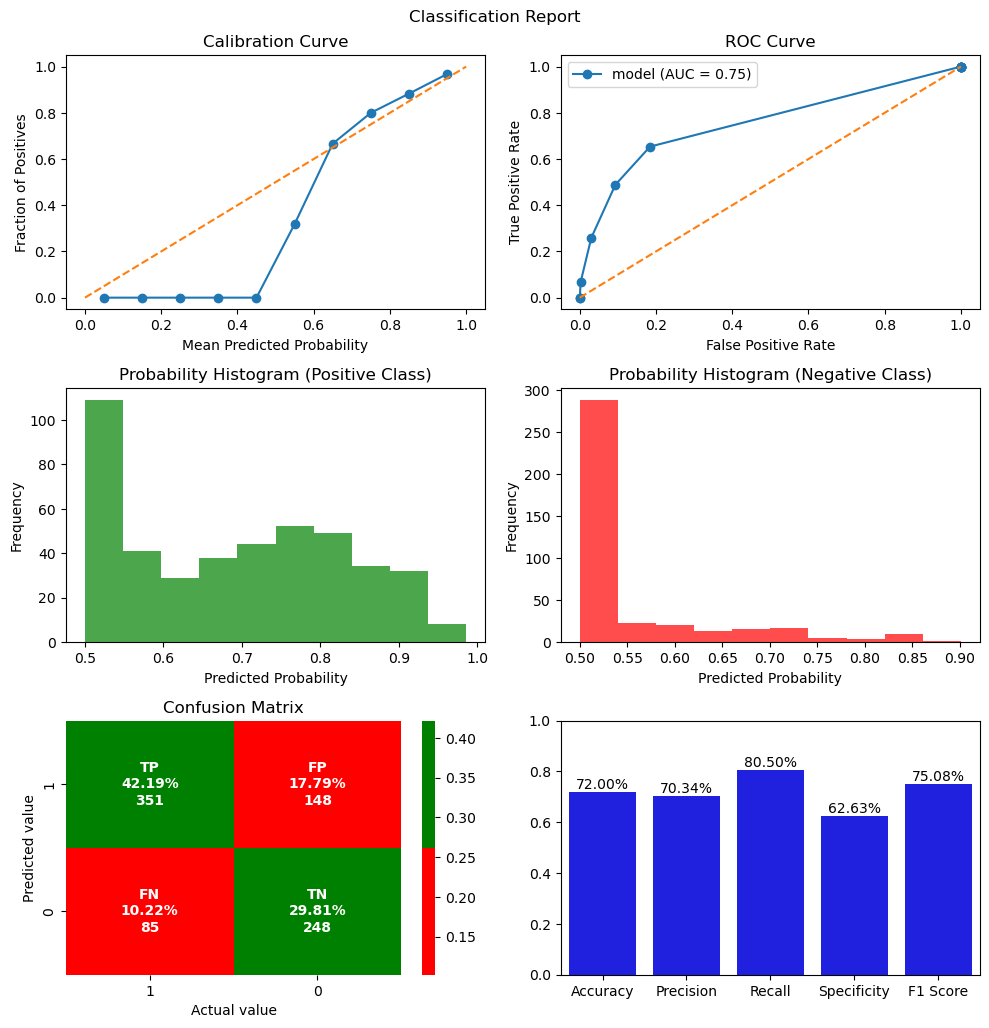

In [ ]:
plot(losses, losses_val, mlp, X_val, y_val)

In [ ]:
criterion = F.binary_cross_entropy
model = NeighborCompressedNN(100, 2, 10).to(device)
model.fit(X, y, 200, device="cuda")
y.shape
features = torch.cat((X, y.view(-1, 1)), dim = 1)

compression = model.neighbors_gate(features).detach().cpu()
import seaborn as sns
sns.scatterplot(x = compression[:, 0], y = compression[:, 1], hue = y.detach().cpu())

In [ ]:
criterion = F.binary_cross_entropy
model = NeighborCompressedNN(X_train, y_train, 100, 15, 10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, l2_lambda=1e-3)

losses = []
losses_val = []

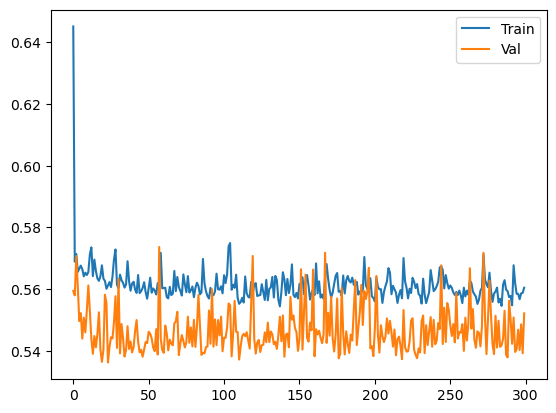

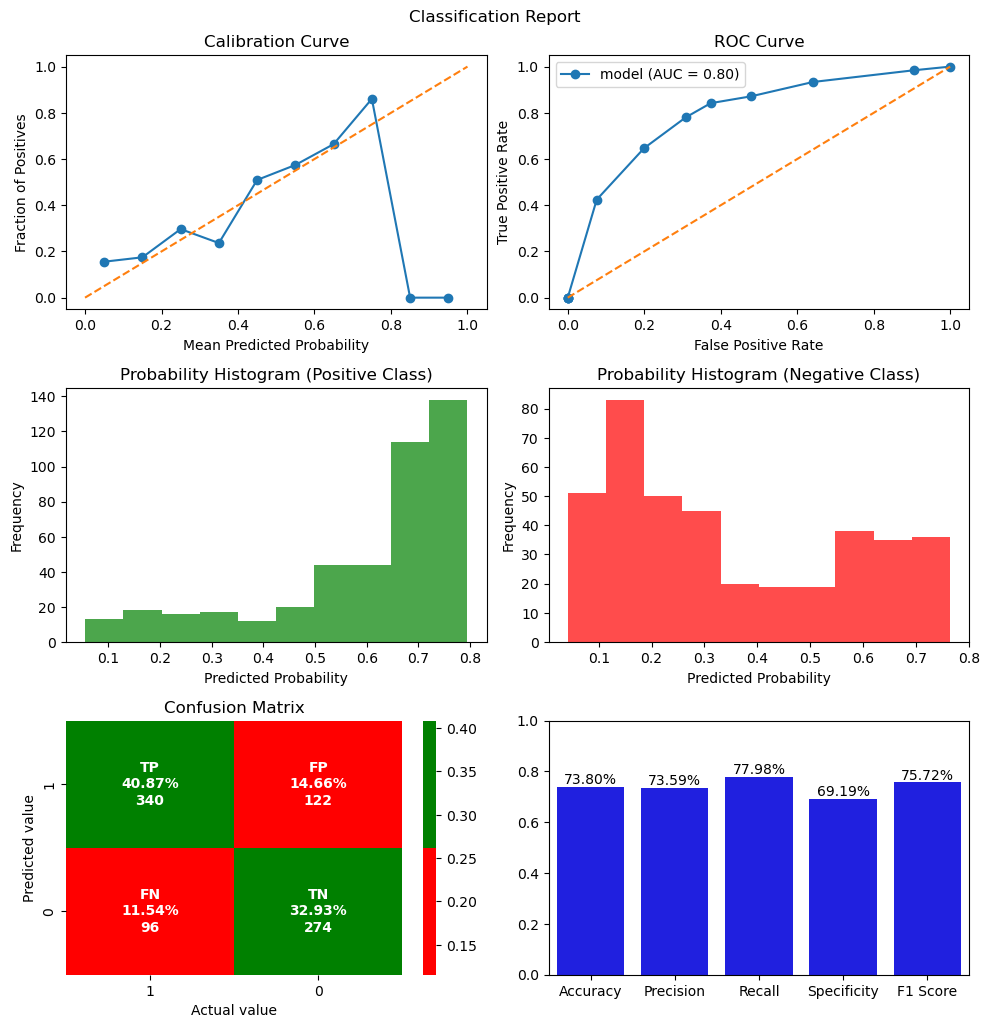

In [ ]:
model.train()
new_losses, new_losses_val = train(X_train, y_train, X_val, y_val, model, criterion, optimizer, epochs = 300, batch_size=64, device = device)
losses = losses + new_losses
losses_val = losses_val + new_losses_val
model.eval()
plot(losses, losses_val, model, X_val, y_val)